In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # generate matha visions
import seaborn as sns

%matplotlib inline

In [15]:
##Allocate the archive path
archlocation=("C:\\Users\\967808\\AnacondaProjects\\DA\\input\\vgsales.csv")
print(archlocation)

##Read the archive using an Pandas function and create a new Dataframe.
df = pd.read_csv(archlocation)
df.head()

~/vgsales.csv


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


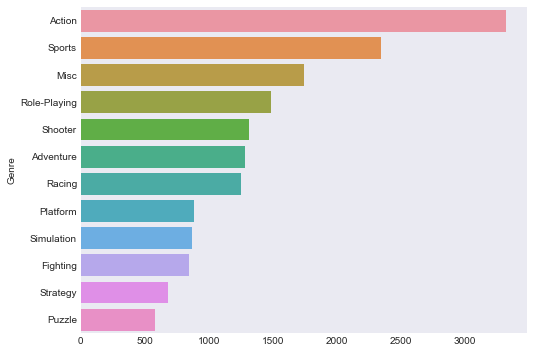

In [16]:
##Bar chart represents the distribution between Plataform and Genre of game

platGenre = pd.crosstab(df.Genre,df.Platform)
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(8,6))
sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient='h')
plt.ylabel = "Platform"
plt.xlabel = "The amount of games"
plt.show()

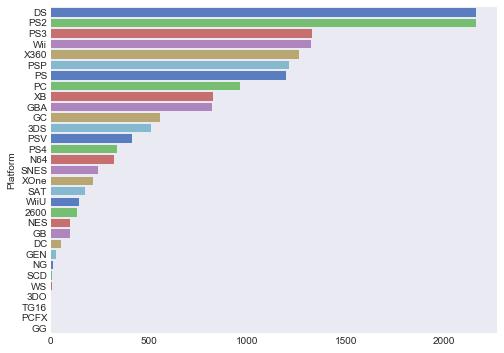

In [31]:
platGenre = pd.crosstab(df.Platform, df.Genre,)
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(8,6))
colors = sns.color_palette("muted")
sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient='h', palette=colors)
plt.ylabel = "Platform"
plt.xlabel = "The amount of games"
plt.show()

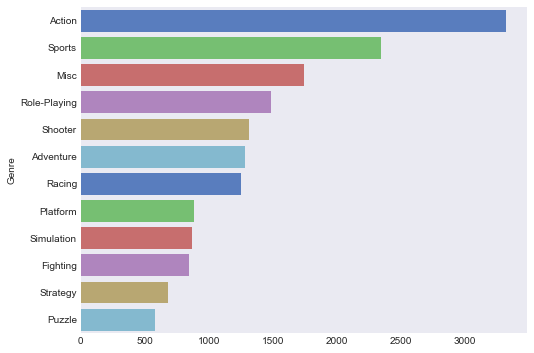

In [32]:
platGenre = pd.crosstab(df.Genre,df.Platform)
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(8,6))
colors = sns.color_palette("muted")
sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient='h', palette=colors)
plt.ylabel = "Platform"
plt.xlabel = "The amount of games"
plt.show()

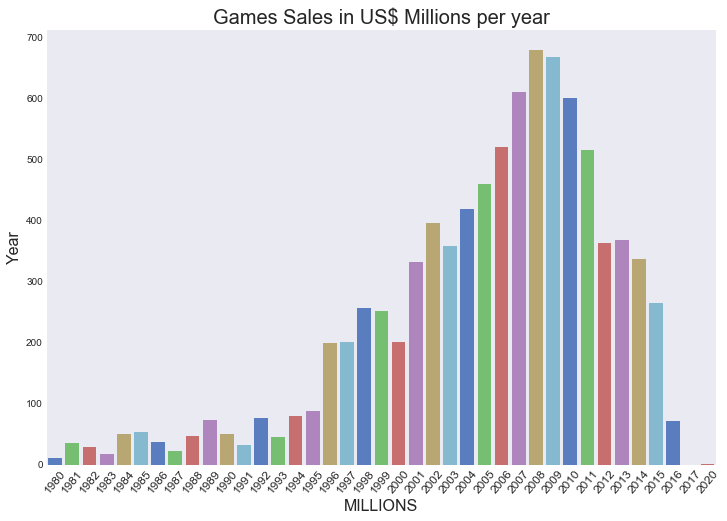

In [33]:
##Total of games sales in $Millions Per Year (from 1980)

y = df.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
colors = sns.color_palette("muted")
ax = sns.barplot(y = y, x = x,  palette=colors)
ax.set_xlabel(xlabel='MILLIONS', fontsize=16)
ax.set_xticklabels(labels=x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label ='Games Sales in US$ Millions per year', fontsize=20)

plt.show();


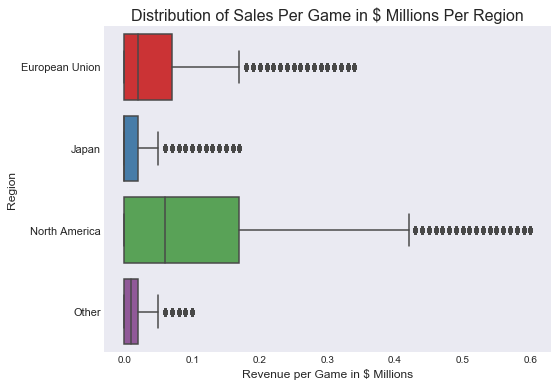

In [36]:
data = df
data = pd.DataFrame([data['EU_Sales'], data['JP_Sales'], data['NA_Sales'], data['Other_Sales']]).T
regions = ['European Union', 'Japan', 'North America', 'Other']
q = data.quantile(0.90)
data = data[data < q]
plt.figure(figsize=(8,6))

colors = sns.color_palette("Set1", len(data))
ax = sns.boxplot(data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue per Game in $ Millions', fontsize=12)
ax.set_ylabel(ylabel='Region', fontsize=12)
ax.set_title(label='Distribution of Sales Per Game in $ Millions Per Region', fontsize=16)
ax.set_yticklabels(labels=regions, fontsize=14)
plt.show()

C:\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in log
C:\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in log
C:\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in log
C:\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
C:\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in log
C:\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in log
C:\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
C:\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: Ru

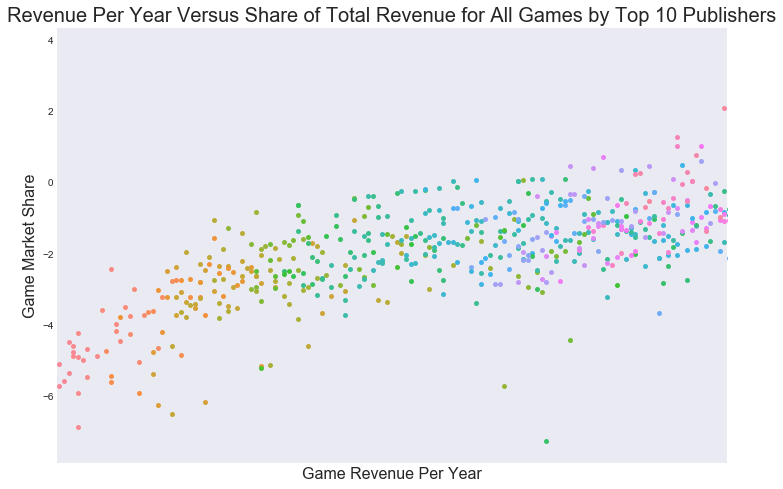

In [44]:
## Calculate renuve per yer (2008)
rpy = df['Global_Sales'] / (2008 - df['Year'])
df['RevPG'] = rpy


##Calculate the market share
ms = df['Global_Sales'] / df['Global_Sales'].sum()
df['MktShr'] = ms

## Pivot table for marketshare
data1 = df.pivot_table('MktShr', columns='Publisher', index='Global_Sales')

## Pivot table for renuve
data2 = df.pivot_table('RevPG', columns='Publisher', index='Global_Sales')


## Set the publisher
EA1 = data1['Electronic Arts']
Act1 = data1['Activision']
Ubi1 = data1['Ubisoft']
Nint1 = data1['Nintendo']
Sony1 = data1['Sony Computer Entertainment']
Tktwo1 = data1['Take-Two Interactive']
Namc1 = data1['Namco Bandai Games']
Kona1 = data1['Konami Digital Entertainment']
THQ1 = data1['THQ']
Seg1 = data1['Sega']

lizt1 = [EA1, Act1, Ubi1, Nint1, Sony1, Tktwo1, Namc1, Kona1, THQ1, Seg1]
data1 = pd.concat(lizt1, ignore_index=True, axis=1)
data1.columns = ['Electronic Arts', 'Activision', 'Ubisoft', 'Nintendo', 'Sony Computer Entertainment', 'Take-Two Interactive', 'Namco Bandai Games', 'Konami Digital Entertainment', 'THQ', 'Sega']
data1.index = range(0, len((data1)))

EA2 = data2['Electronic Arts']
Act2 = data2['Activision']
Ubi2 = data2['Ubisoft']
Nint2 = data2['Nintendo']
Sony2 = data2['Sony Computer Entertainment']
Tktwo2 = data2['Take-Two Interactive']
Namc2 = data2['Namco Bandai Games']
Kona2 = data2['Konami Digital Entertainment']
THQ2 = data2['THQ']
Seg2 = data2['Sega']

lizt2 = [EA2, Act2, Ubi2, Nint2, Sony2, Tktwo2, Namc2, Kona2, THQ2, Seg2]
data2 = pd.concat(lizt2, ignore_index=True, axis=1)
data2.columns = ['Electronic Arts', 'Activision', 'Ubisoft', 'Nintendo', 'Sony Computer Entertainment', 'Take-Two Interactive', 'Namco Bandai Games', 'Konami Digital Entertainment', 'THQ', 'Sega']
data2.index = range(0, len((data1)))

fig = plt.figure(figsize=(12,8))
ax = sns.swarmplot(x=np.log(data1['Activision']), y=np.log(data2['Activision']), label='Activision')
ax = sns.swarmplot(x=np.log(data1['Ubisoft']), y=np.log(data2['Ubisoft']), label='Ubisoft')
ax = sns.swarmplot(x=np.log(data1['Nintendo']), y=np.log(data2['Nintendo']), label='Nintendo')
ax = sns.swarmplot(x=np.log(data1['Take-Two Interactive']), y=np.log(data2['Take-Two Interactive']), label='Take=Two Interactive')
ax = sns.swarmplot(x=np.log(data1['Sony Computer Entertainment']), y=np.log(data2['Sony Computer Entertainment']), label='Sony Computer Entertainment')
ax = sns.swarmplot(x=np.log(data1['Electronic Arts']), y=np.log(data2['Electronic Arts']), label='Electronic Arts')
ax = sns.swarmplot(x=np.log(data1['Namco Bandai Games']), y=np.log(data2['Namco Bandai Games']), label='Namco Bandai Games')
ax = sns.swarmplot(x=np.log(data1['Konami Digital Entertainment']), y=np.log(data2['Konami Digital Entertainment']), label='Konami Digital Entertainment')
ax = sns.swarmplot(x=np.log(data1['THQ']), y=np.log(data2['THQ']), label='THQ')
ax = sns.swarmplot(x=np.log(data1['Sega']), y=np.log(data2['Sega']), label='Sega')



ax.set_xlabel(xlabel='Game Revenue Per Year', fontsize=16)
ax.set_ylabel(ylabel='Game Market Share', fontsize=16)
ax.set_title(label='Revenue Per Year Versus Share of Total Revenue for All Games by Top 10 Publishers', fontsize=20)

plt.tick_params(axis='x', which='both', bottom='off',
                top='off', labelbottom='off')
plt.show();